In [1]:
from IPython import display as dspl

import time

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as data
import torchvision

# Exercitiul 1

### Cerinte
  1. Printati numarul de exemple din datasetul de antrenare si de test
  2. Printati exemplul de la indexul 0
  3. Printati valoarea maxima si valoarea minima din prima imagine din datasetul de test

#### Hints
 * Un exemplu din dataset este reprezentat de un tuplu care contine o imagine de tip de date PIL.Image si un int reprezentand clasa imaginii
 * np.min(a) -> returneaza minimul dintr-un obiect de tipul np.ndarray
 * np.max(a) -> returneaza maximul dintr-un obiect de tipul np.ndarray
 * np.asarray(a) -> returneaza un obiect de tipul np.ndarray. Functia trebuie sa primeaca un obiect 'array-like'

In [2]:
# Crearea instantelor pentru setul de date CIFAR de train si de test
cifar_train = torchvision.datasets.CIFAR10("./data", download=True)
cifar_test = torchvision.datasets.CIFAR10("./data", train=False)

# Cerinta 1
print(len(cifar_train), len(cifar_test))

# Cerinta 2
print(cifar_train[0])
print(cifar_test[0])

# Cerinta 3
print(np.max(np.asarray(cifar_test[0][0])))
print(np.min(np.asarray(cifar_test[0][0])))


Extracting ./data/cifar-10-python.tar.gz to ./data
50000 10000
(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F704CA3E290>, 6)
(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F704CA3E550>, 3)
255
13


# Exercitiul 2

### Cerinte
 * Odata la n pasi, printati clasa exemplului curent si afisati imaginea.

#### Hints
  * A fost importata libraria matplotlib.pyplot as plt
  * Functia plt.figure(figsize=(float, float)) returneaza o figura de dimensiunea oferita ca parametru in *figsize*
  * Functia plt.imshow(np.ndarray) plaseaza o imagine pe o figura
  * Functia plt.show() afiseaza figura

1


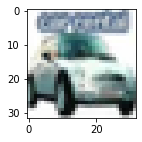

In [4]:
n = 10000

for idx, example in enumerate(cifar_train):
  if idx % n == 0:
    # Aceasta functie sterge ce a fost afisat pana la momentul curent
    dspl.clear_output(wait=True)
  
    # Cerinta
    print(example[1])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.asarray(example[0]))
    plt.show()

    # alta varianta de afisare a imaginilor
    # dspl.display(example[0])
    
    # Aceasta functie opreste procesul pentru 2 secunde 
    time.sleep(2)

# Exercitiul 3

### Cerinte
  1. Iterati prin cele doua obiecte de tip DataLoader si printati doar primul element.
  2. Printati shape-ul celor 2 tensori  doar pentru primul element

#### Hints
  * functia __to_tensor__ din *torchvision.transforms.functional* creaza un obiect de tip torch.Tensor dintr-un obiect de tip PIL.Image
  * functia __torch.tensor__ creaza un obiect de tip torch.Tensor dintr-un obiect de tip np.ndarray
  * functia __unsqueeze()__ din clasa torch.Tensor creaza o noua dimensiune intr-un tensor. Aceasta este echivalentul functiei __expand_dims()__ din numpy. Exemplu: Daca avem un obiect de tip torch.Tensor, *t*, care contine un vector cu 10 elemente (shape [10]), *t.unsqueeze(0)* va returna un obiect cu aceleasi valori dar cu shape-ul [1, 10]
  * functia __torch.cat(tensors, dim=0)__ primeste o lista de tensori si ii concateneaza de-a lungul dimensiunii *dim*. Exemplu: functia primeste o lista cu doi vectori cu shape-ul [1, 10] si *dim=0*, rezultatul are shape-ul [2, 10] (batch 2 ?). Daca *dim=1*, rezultatul va fi [1, 20]. Echivalentul numpy este functia __concatenate()__
  * functia __size()__ din clasa torch.Tensor returneaza shape-ul tensorului

In [3]:
from torchvision.transforms.functional import to_tensor

def preproc_fn(examples):
  """
    Functia primeste un batch de exemple pe care trebuie sa le transforme in tensori
      si sa le puna intr-un batch de tip torch.Tensor.
  """
  processed_images = []
  processed_labels = []

  # print(processed_images)

  for example in examples: # example este un tuplu returnat de obiectul de tip Dataset
    pil_image = example[0]
    #pil_image_array = np.asarray(pil_image)

    tensor_image = to_tensor(pil_image)  # Transformati in obiect de tip torch.Tensor imaginea din example
    tensor_image = tensor_image.unsqueeze(0) # Adaugati inca o dimensiune la inceputul imaginii
    processed_images.append(tensor_image)

    label = np.array([example[1]])# Creati un obiect de tip np.ndarray din labelul exemplului
    tensor_label = torch.Tensor(label)# Creati un tip de tip torch.Tensor din label
    tensor_label = tensor_label.unsqueeze(0) # Adaugati inca o dimensiune la incepului labelului
    processed_labels.append(tensor_label)

  torch_images = torch.cat(processed_images,  dim=0)
  torch_labels = torch.cat(processed_labels, dim=0)

  return torch_images, torch_labels

loader1 = data.DataLoader(cifar_train, batch_size=1000, shuffle=True, collate_fn=preproc_fn)

print("Datasetul contine {} de batch-uri".format(len(loader1)))

loader2 = data.DataLoader(cifar_train, batch_size=1000, shuffle=True, num_workers=2, collate_fn=preproc_fn)

start = time.time()

for index, el in enumerate(loader1):

  # Cerintele 1 si 2 - Iterati prin loader1 si printati doar primul element si shape-ul celor 2 tensori din exemplu
  if index == 0:
    print("Primul element din loader1: ", el)
    print("Lungime tensor1: ", el[0].size())
    print("Lungime tensor2: ", el[1].size())

end = time.time()
print("Iterarea prin dataset cu worker-ul pe procesul curent dureaza {} secunde".format(end - start))

print("\n-------------------------------------------------\n")

start = time.time()

for index, el in enumerate(loader2):

  # Cerintele 1 si 2 - Iterati prin loader2 si printati doar primul element si shape-ul celor 2 tensori din exemplu
  if index == 0:
    print("Primul element din loader2: ", el)
    print("Lungime tensor1: ", el[0].size())
    print("Lungime tensor2: ", el[1].size())

end = time.time()
print("Iterarea prin dataset cu 2 worker-i pe procese diferite dureaza {} secunde".format(end - start))

Datasetul contine 50 de batch-uri
Primul element din loader1:  (tensor([[[[0.0078, 0.0157, 0.0510,  ..., 0.0745, 0.0275, 0.0118],
          [0.0078, 0.0235, 0.0941,  ..., 0.1686, 0.1098, 0.0196],
          [0.0039, 0.0353, 0.1451,  ..., 0.3490, 0.2000, 0.0510],
          ...,
          [0.0275, 0.0392, 0.0471,  ..., 0.5255, 0.6549, 0.7333],
          [0.0314, 0.0392, 0.0510,  ..., 0.5020, 0.6353, 0.7216],
          [0.0235, 0.0353, 0.0549,  ..., 0.4980, 0.5922, 0.6706]],

         [[0.0196, 0.0392, 0.0784,  ..., 0.1647, 0.0706, 0.0118],
          [0.0627, 0.1020, 0.1255,  ..., 0.1882, 0.1490, 0.0588],
          [0.1059, 0.1725, 0.1804,  ..., 0.2353, 0.1765, 0.0980],
          ...,
          [0.1608, 0.2549, 0.3176,  ..., 0.3373, 0.4078, 0.5608],
          [0.1412, 0.2392, 0.3059,  ..., 0.2745, 0.3373, 0.4706],
          [0.1098, 0.2078, 0.2824,  ..., 0.2588, 0.2667, 0.3529]],

         [[0.2549, 0.3882, 0.3843,  ..., 0.3922, 0.2745, 0.1569],
          [0.3451, 0.4510, 0.3294,  ..., 0.2

# Exercitiul 4

### Cerinte
  1. In constructorul clasei *SingleLayerNet* definiti un atribut care sa contina un obiect de tip *nn.Linear*
  2. In constructorul clase *SingleLayerNet* definiti un atribut care sa contina un obiect de tip *nn.Sigmoid*
  3. In metoda __forward()__ definiti o variabila care sa contina iesirea stratului linear aplicat pe intrarea 'x'.
  4. In metoda __forward()__ definiti o variabila care sa contina iesirea functiei de activare sigmoid aplicata pe iesirea stratului linear si returnati aceasta variabila

#### Hint
 * Imaginea de intrare are dimensiune 32x32x3 (inaltime x latime x canale). Vectorul de intrare in retea va avea dimensiune 3072.

#### Atentie
 * Dimensiunea de iesire a stratului trebuie sa fie de aceeasi marime cu numarul de clase.

In [5]:
import torch.nn as nn

class SingleLayerNet(nn.Module):

  def __init__(self):
    super(SingleLayerNet, self).__init__()

    # Cerinta 1 
    self.linear1 = nn.Linear(3072, 10)
    
    # Cerinta 2 
    self.activation1 = nn.Sigmoid()

  def forward(self, x: torch.Tensor):
    # Cerintele 3 si 4 
    output_linear = self.linear1(x)
    output = self.activation1(output_linear)
    
    return output


# Exercitiul 5

### Cerinte
  1. In constructorul clasei *TwoLayerNet* definiti doua atribute care sa contina doua obiecte de tip *nn.Linear*. 
  2. In constructorul clasei *TwoLayerNet* definiti un atribut care sa contina un obiect de tip *nn.Sigmoid* (se poate folosi acelasi obiect de tip *nn.Sigmoid* pentru activarea ambelor straturi *nn.Linear*)
  3. Implementati metoda **forward()** similar cu exercitul anterior (layer1->activation->layer2->activation).

In [6]:
class TwoLayerNet(nn.Module):

  def __init__(self):
    super(TwoLayerNet, self).__init__()
    # Cerinta 1 
    self.linear1 = nn.Linear(3072, 100)
    self.linear2 = nn.Linear(100, 10)

    # Cerinta 2
    self.activation = nn.Sigmoid()

  def forward(self, x: torch.Tensor):
    # Cerinta 3 si 4- completati codul aici
    output_linear1 = self.linear1(x)
    output_activation1 = self.activation(output_linear1)
    output_linear2 = self.linear2(output_activation1)
    output = self.activation(output_linear2)

    return output

# Exercitiul 6


Avand o retea cu straturi 'fully-connected' este necesar ca imaginea sa fie redimensionata intr-un vector. Clasa *torch.Tensor* defineste metoda __view()__ care returneaza un tensor redimensionat.

### Cerinte
  1. Completati functia de mai jos pentru a redimensiona imaginea intr-un vector.
  2. Extrageti un batch din DataLoader-ul de antrenare si printati dimensiunile imaginii.

In [8]:
from torchvision.transforms.functional import normalize
import numpy as np

def preproc_liniarized_fn(examples):
  processed_images = []
  processed_labels = []

  for example in examples:
    tensor_image = to_tensor(example[0])
    # In linia de mai jos imaginea este normalizata astfel incat sa aiba toate valorile in 
    # [-1, 1] in loc de [0, 255]
    normalized_tensor_image = normalize(tensor_image, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])

    # Cerinta 1 
    vector_image = normalized_tensor_image.reshape(-1)
    vector_image = vector_image.unsqueeze(0)
    processed_images.append(vector_image)
    
    label = np.array(example[1])
    tensor_label = torch.tensor(label)
    tensor_label = tensor_label.unsqueeze(0)
    processed_labels.append(tensor_label)

  torch_images = torch.cat(processed_images, dim=0)
  torch_labels = torch.cat(processed_labels, dim=0)

  return torch_images, torch_labels

batch_size = 100

train_loader = data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True, num_workers=2, collate_fn=preproc_liniarized_fn)
test_loader = data.DataLoader(cifar_test, batch_size=1, shuffle=False, collate_fn=preproc_liniarized_fn)

# Cerinta 2 
random_batch = next(iter(train_loader))
print(random_batch[0].shape)


torch.Size([100, 3072])


# Exercitiul 7

### Cerinte
 1. Instantiati un obiect de tip *TwoLayerNet*.
 2. Definiti un optimizator pentru antrenarea acestei retele
 3. Folositi functia deifnita mai sus pentru a antrena aceasta retea (*train_fn*).

#### Atentie
 * Dimensiunea de iesire a primului strat trebuie sa se potriveasca cu dimensiunea de intrare a celui de-al doilea.

In [ ]:
import torch.optim as optim

# Definim numarul de epoci
epochs = 10

# Definim reteaua
single_layer_net = SingleLayerNet()

# Definim optimizatorul
optimizer = optim.SGD(single_layer_net.parameters(), lr=1e-2)
# Dupa definirea optimizatorului si dupa fiecare iteratie trebuie apelata functia zero_grad().
# Aceasta face toti gradientii zero.
optimizer.zero_grad()

# Definim functia cost
loss_fn = nn.CrossEntropyLoss()

def train_fn(epochs: int, train_loader: data.DataLoader, test_loader: data.DataLoader, 
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  # Iteram prin numarul de epoci
  for e in range(epochs):
    # Iteram prin fiecare exemplu din dataset
    for images, labels in train_loader:

      # Aplicam reteaua neurala pe imaginile de intrare
      out = net(images)
      # Aplicam functia cost pe iesirea retelei neurale si pe adnotarile imaginilor 
      loss = loss_fn(out, labels)
      # Aplicam algoritmul de back-propagation
      loss.backward()
      # Facem pasul de optimizare, pentru a aplica gradientii pe parametrii retelei
      optimizer.step()
      # Apelam functia zero_grad() pentru a uita gradientii de la iteratie curenta
      optimizer.zero_grad()
    
    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    # Calculul acuratetii
    count = len(test_loader)
    correct = 0

    for test_image, test_label in test_loader:
      out_class = torch.argmax(net(test_image))
      if out_class == test_label:
        correct += 1

    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, (correct / count) * batch_size))

In [ ]:
# Cerinta 1

# Definim numarul de epoci
epochs = 10

# Instantierea retelei
two_layer_net = TwoLayerNet()

# Cerinta 2
optimizer2 = optim.SGD(two_layer_net.parameters(), lr=1e-2)

# Dupa definirea optimizatorului si dupa fiecare iteratie trebuie apelata functia zero_grad().
# Aceasta face toti gradientii zero.
optimizer2.zero_grad()

# Definim functia de cost
loss_fn2 = nn.CrossEntropyLoss()

# Cerinta 3 - Antrenati reteaua
# print(next(iter(train_loader))[0].shape)
# print(next(iter(test_loader))[0].shape)
train_fn(epochs, train_loader, test_loader, two_layer_net, loss_fn2, optimizer2)


Loss-ul la finalul epocii 0 are valoarea 2.273749351501465
Acuratetea la finalul epocii 0 este 22.58%
Loss-ul la finalul epocii 1 are valoarea 2.247694969177246
Acuratetea la finalul epocii 1 este 26.83%
Loss-ul la finalul epocii 2 are valoarea 2.2476608753204346
Acuratetea la finalul epocii 2 este 27.90%
Loss-ul la finalul epocii 3 are valoarea 2.2074670791625977
Acuratetea la finalul epocii 3 este 28.20%
Loss-ul la finalul epocii 4 are valoarea 2.193324089050293
Acuratetea la finalul epocii 4 este 28.43%
Loss-ul la finalul epocii 5 are valoarea 2.1699512004852295
Acuratetea la finalul epocii 5 este 28.97%
Loss-ul la finalul epocii 6 are valoarea 2.1747167110443115
Acuratetea la finalul epocii 6 este 29.32%
Loss-ul la finalul epocii 7 are valoarea 2.147615432739258
Acuratetea la finalul epocii 7 este 29.46%
Loss-ul la finalul epocii 8 are valoarea 2.1571390628814697
Acuratetea la finalul epocii 8 este 29.72%
Loss-ul la finalul epocii 9 are valoarea 2.152998924255371
Acuratetea la fina

# BONUS

## Antrenarea retelei cu N straturi

Mai jos functia de antrenare a fost modificata pentru a afisa modificarile parametrilor retelei in timpul antrenarii. Aceasta se obtine prin implementarea functiei __plot_weights()__.

## Cerinte 

  1. Creati un obiect de tipul *Net*
  2. Creati un optimizator pentru reteaua de tipul *Net*
  3. Antrenati reteaua folosind functia __plotting_train_fn()__
  4. Experimentati cu retele straturi si functii de activare diferite
  5. Modificati celula de mai jos si scrieti o functie numita __plot_loss()__ pentru a afisa un grafic care arata evolutia rezultatului functiei cost in timp. Faceti acelasi lucru si pentru acuratete.

In [9]:
class Net(nn.Module):

  def __init__(self, layer_sizes: list, activation: type):
    """
      Constructor.

      :param layer_sizes - Parametru de tip lista care contine dimensiunile fiecarui strat din retea
      :param activation - Parametru de tip type. Poate fi nn.Sigmoid, nn.Tanh, nn.ReLU. Adica clasa pentru a instantia mai tarziu
    """
    super(Net, self).__init__()
    
    #
    layers = []
   
    for i in range(0, len(layer_sizes)):
      inl, out = layer_sizes[i]
      layers.append(nn.Linear(inl, out))
      layers.append(activation)

    self.net = nn.Sequential(*layers)

  def forward(self, x: torch.Tensor):
    return self.net(x)

Loss-ul la finalul epocii 0 are valoarea 2.1783030033111572
Acuratetea la finalul epocii 0 este 27.31%


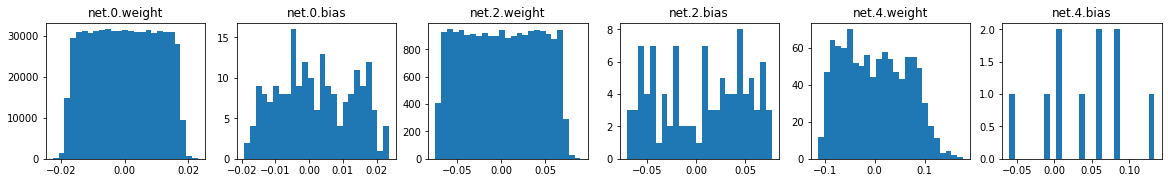

Loss-ul la finalul epocii 1 are valoarea 1.9770714044570923
Acuratetea la finalul epocii 1 este 33.94%


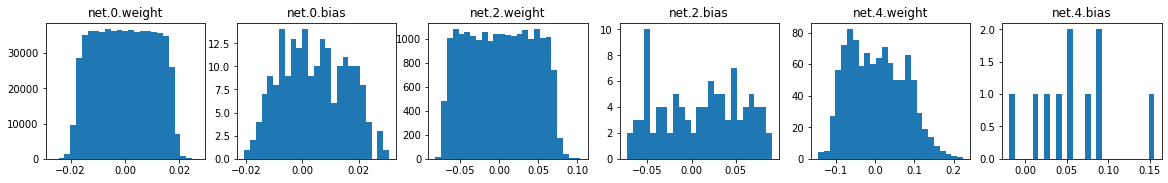

Loss-ul la finalul epocii 2 are valoarea 1.814253807067871
Acuratetea la finalul epocii 2 este 37.12%


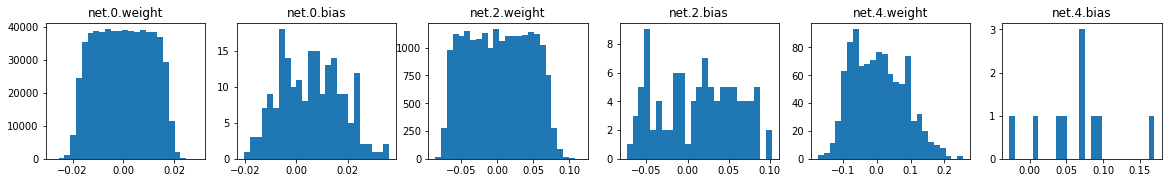

Loss-ul la finalul epocii 3 are valoarea 1.924536108970642
Acuratetea la finalul epocii 3 este 38.50%


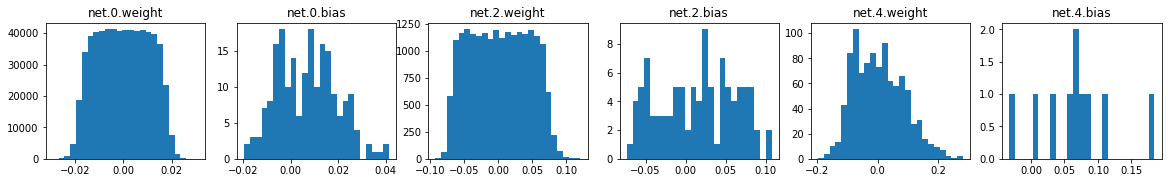

Loss-ul la finalul epocii 4 are valoarea 1.796633005142212
Acuratetea la finalul epocii 4 este 40.04%


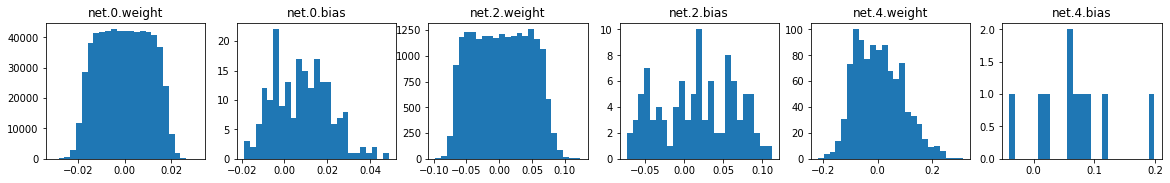

Loss-ul la finalul epocii 5 are valoarea 1.8029195070266724
Acuratetea la finalul epocii 5 este 41.25%


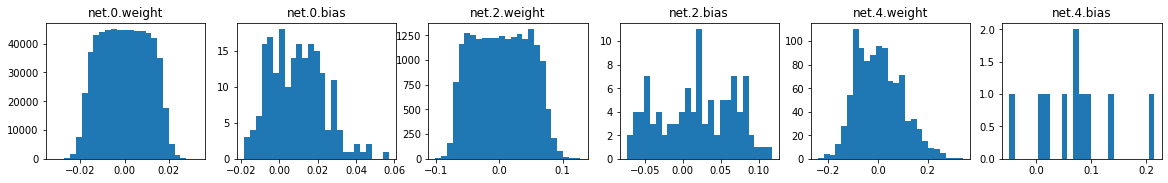

Loss-ul la finalul epocii 6 are valoarea 1.8278034925460815
Acuratetea la finalul epocii 6 este 42.34%


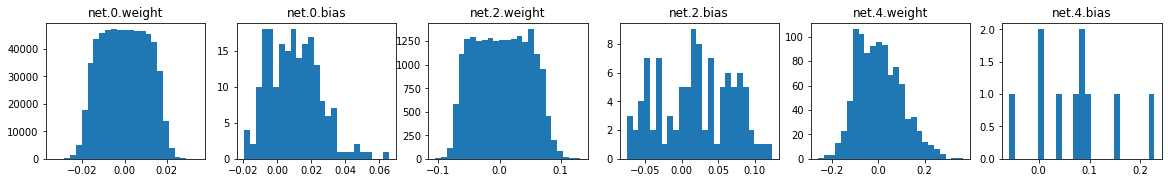

In [ ]:
def plot_details():
  plt.figure("Evolutia functiei de cost in timp.")
  plt.title("Evolutia functiei de cost in timp.")
  plt.plot(loss_list)
  plt.show()

  plt.figure("Evolutia acuratetei in timp.")
  plt.title("Evolutia acuratetei in timp.")
  plt.plot(acc_list)
  plt.show()

def plot_weights(net: nn.Module):
  named_params = net.named_parameters()
  np_params = []
  np_param_names = []
  for name, param in named_params:
    np_params.append(param.clone().detach().view(-1).numpy())
    np_param_names.append(name)

  fig = plt.figure(figsize=(20, 2.5))

  count = len(np_param_names)
  for i in range(count):
    plt.subplot(1, count, i+1)
    plt.hist(np_params[i], bins=25)
    plt.title(np_param_names[i])
  plt.show()


def plotting_train_fn(epochs: int, train_loader: data.DataLoader, test_loader: data.DataLoader, 
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  for e in range(epochs):
    for images, labels in train_loader:

      out = net(images)
      loss = loss_fn(out, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    loss_list.append(loss.item())
    
    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    count = len(test_loader)
    correct = 0

    for test_image, test_label in test_loader:
      out_class = torch.argmax(net(test_image))
      if out_class == test_label:
        correct += 1
    
    acc = (correct / count) * 100
    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, acc))
    acc_list.append(acc)
    plot_weights(net) 

# Cerinta 1 
layer_size = [(3072, 200), (200, 100), (100, 10)] 
# layer_size = [(3072, 1500), (1500, 200), (200, 10)] <- # Cerinta 4

nn_layer_net = Net(layer_size, nn.ReLU())

# Cerinta 2 
optimizer_n = optim.SGD(nn_layer_net.parameters(), lr=1e-2)
optimizer_n.zero_grad()

loss_fn_n = nn.CrossEntropyLoss()
loss_list = []
acc_list = []

# Cerinta 3
plotting_train_fn(10, train_loader, test_loader, nn_layer_net, loss_fn_n, optimizer_n)

# Cerinta 5
# apelam functia definita la inceputul celulei
plot_details()